In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import neighbors
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import KFold
from scipy.stats import norm
from operator import itemgetter
from sklearn.model_selection import cross_val_score

In [2]:
dfHistorical = pd.read_csv('mvps.csv')
dfCurrent = pd.read_csv('output1.csv')

In [3]:
dfHistorical.head()


,Rank,Player,Age,Tm,Pts Won,Pts Max,Share,G,Team Wins,Overall Seed,...,3P%,FT%,WS,WS/48,VORP,BPM,G-Lockout,Wins-Lockout,WS-Lockout,VORP-Lockout
0,1,Kareem Abdul-Jabbar,32,LAL,147.0,221,0.665,82.0,60.0,2,...,0.000,0.765,14.8,0.227,6.8,6.7,NaN,NaN,NaN,NaN
1,2,Julius Erving,29,PHI,31.5,221,0.143,78.0,59.0,3,...,0.200,0.787,12.5,0.213,6.5,7.2,NaN,NaN,NaN,NaN
2,3,George Gervin,27,SAS,19.0,221,0.086,78.0,41.0,10,...,0.314,0.852,10.6,0.173,3.1,2.2,NaN,NaN,NaN,NaN
3,4,Larry Bird,23,BOS,15.0,221,0.068,82.0,61.0,1,...,0.406,0.836,11.2,0.182,5.4,5.3,NaN,NaN,NaN,NaN
4,5,Tiny Archibald,31,BOS,2.0,221,0.009,80.0,61.0,1,...,0.222,0.830,8.9,0.148,1.5,0.0,NaN,NaN,NaN,NaN


In [4]:
import seaborn as sns


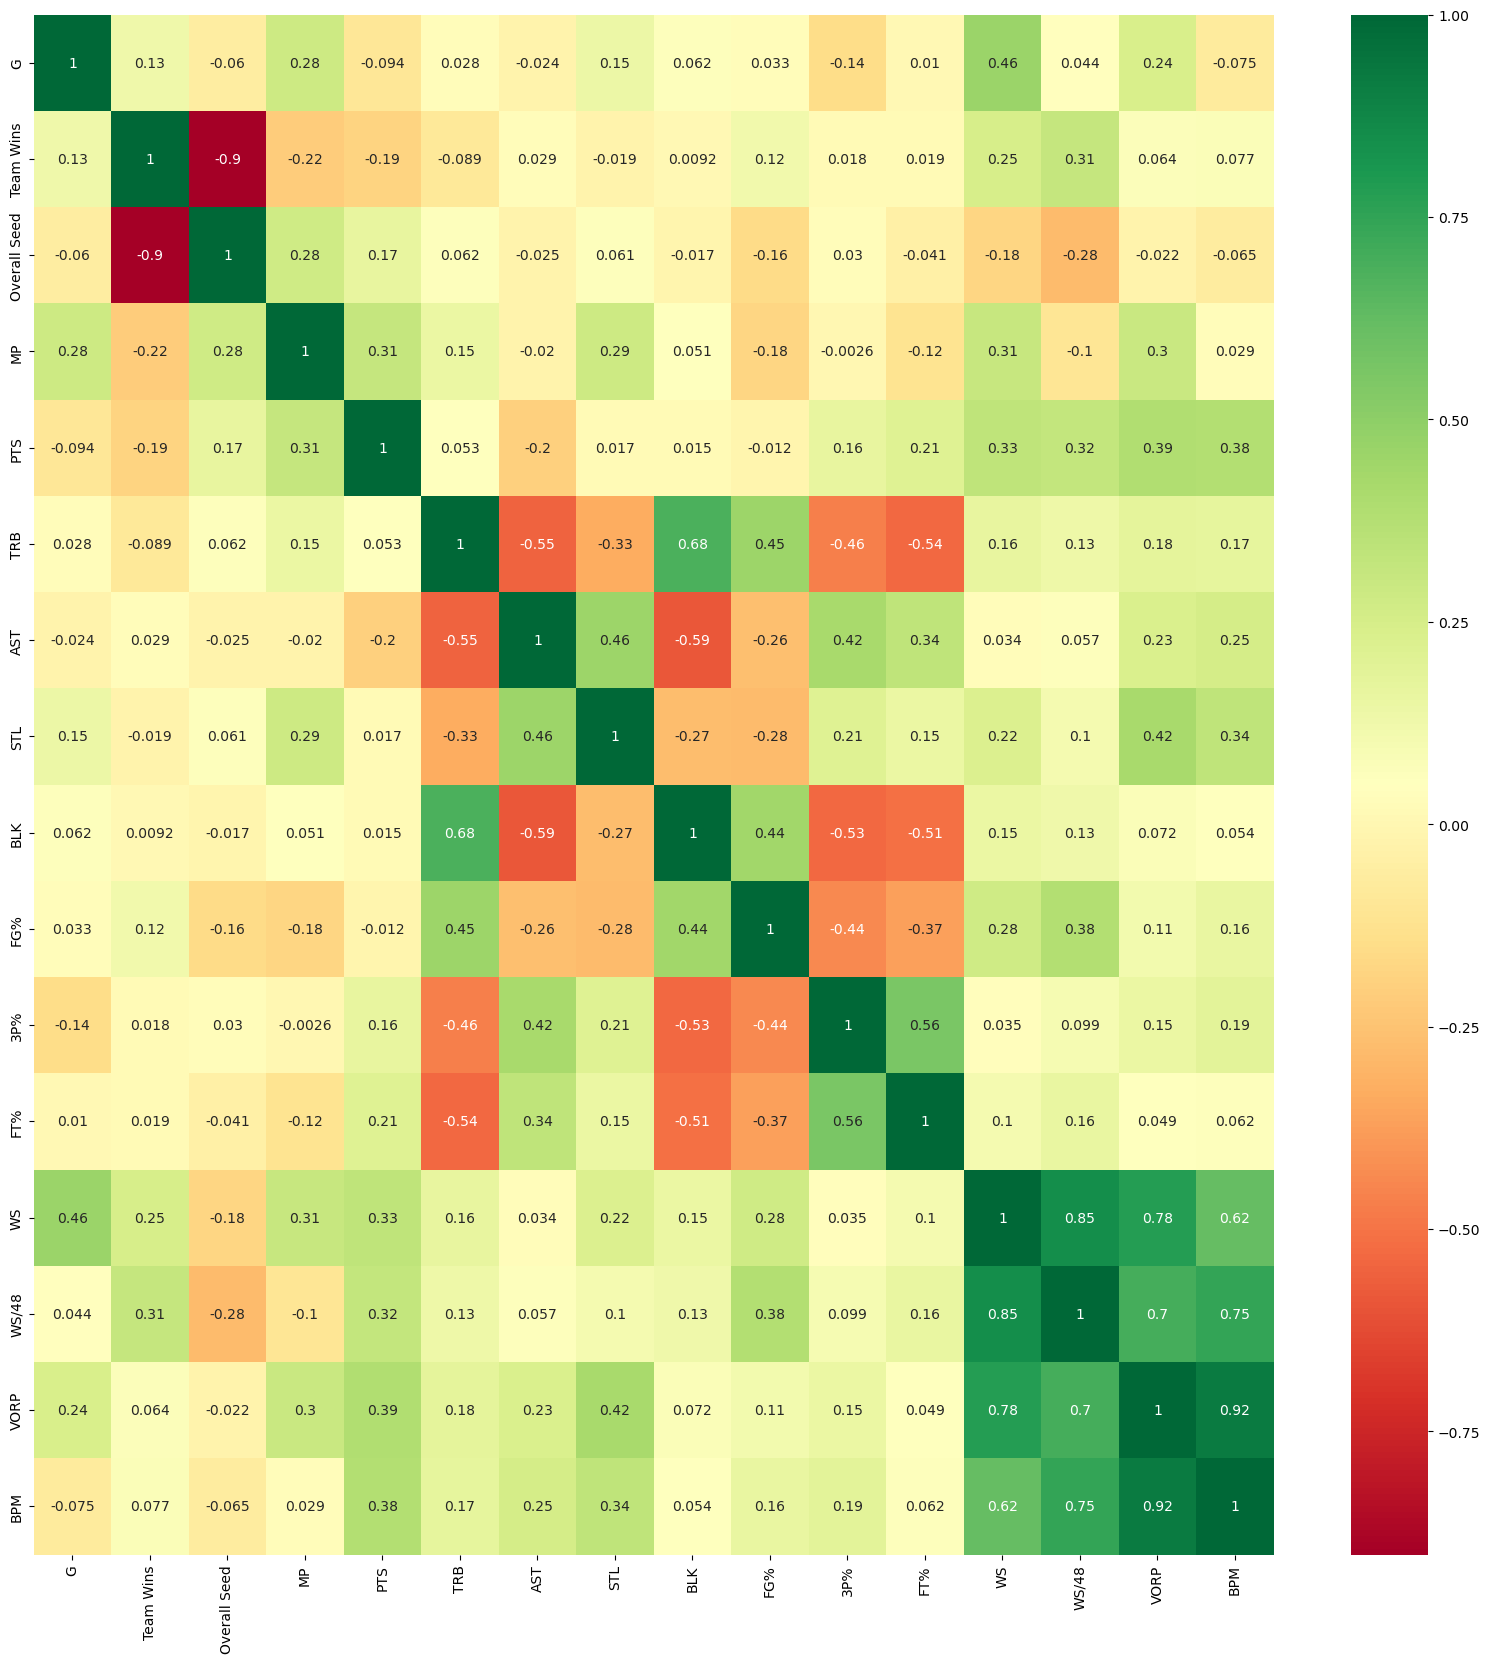

In [5]:
Historical = dfHistorical[['G', 'Team Wins', 'Overall Seed', 'MP', 'PTS', 'TRB', 'AST', 'STL','BLK', 'FG%', '3P%','FT%', 'WS', 'WS/48', 'VORP', 'BPM']]

fig = plt.figure(figsize=(20, 20))

fig.set_facecolor('white')

sns.heatmap(Historical.corr(), annot=True, cmap="RdYlGn")

plt.savefig("corr_matrix.png")

In [16]:
train, test = train_test_split(dfHistorical, test_size = 0.25, random_state = 10)

xtrain = train[['G', 'Team Wins', 'MP', 'WS/48', 'BPM', '3P%', 'FT%', 'BLK', 'STL', 'Overall Seed', 'PTS', 'TRB', 'AST', 'FG%', 'VORP', 'WS']]
ytrain = train[['Share']]

xtest = test[['G', 'Team Wins', 'MP', 'WS/48', 'BPM', '3P%', 'FT%', 'BLK', 'STL', 'Overall Seed', 'PTS', 'TRB', 'AST', 'FG%', 'VORP', 'WS']]
ytest = test[['Share']]

In [17]:
def scores(y, model):
    
    model.fit(xtrain, ytrain.values.ravel())
    y_pred = model.predict(xtest)
    
    print("Mean squared error: %.3f" % mean_squared_error(ytest, y_pred))
    print('R2 score: %.3f' % r2_score(ytest, y_pred))

    cvScore = cross_val_score(model, xtest, ytest.values.ravel(), cv = 3, scoring = 'r2')
    print("R2 cross validation score: %0.2f (+/- %0.2f)" % (cvScore.mean(), cvScore.std() * 2))
    
    for i in y_pred:
        y.append(i)


In [19]:
rf = RandomForestRegressor(random_state = 200, n_estimators = 100, criterion = 'squared_error')

y_rf = []

scores(y_rf, rf)

Mean squared error: 0.038
R2 score: 0.561
R2 cross validation score: 0.48 (+/- 0.12)


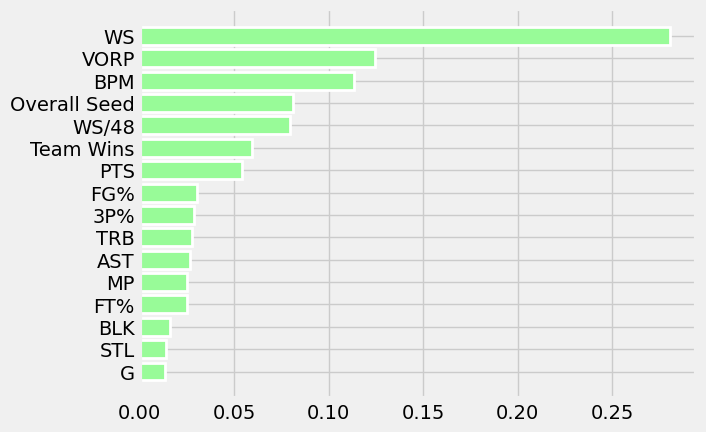

In [20]:
plt.style.use('fivethirtyeight')
rf.feature_importances_
sorted_idx = rf.feature_importances_.argsort()
plt.barh(xtrain.columns[sorted_idx], rf.feature_importances_[sorted_idx], color= 'palegreen', edgecolor= 'white', linewidth = 2)
plt.savefig('RFfeatureimportance.jpeg', dpi = 400, bbox_inches = 'tight')
